In [ ]:
import nltk
nltk.download('all', quiet=True)

True

In [ ]:
from nltk.corpus import PlaintextCorpusReader

In [ ]:
corpus_root = "/content"
corpus_esp = PlaintextCorpusReader(corpus_root, ".*")

In [ ]:
corpus_esp.fileids()

['.config/.last_opt_in_prompt.yaml',
 '.config/.last_survey_prompt.yaml',
 '.config/.last_update_check.json',
 '.config/active_config',
 '.config/config_sentinel',
 '.config/configurations/config_default',
 '.config/gce',
 '.config/logs/2022.08.31/13.46.22.077074.log',
 '.config/logs/2022.08.31/13.46.43.989608.log',
 '.config/logs/2022.08.31/13.47.03.944288.log',
 '.config/logs/2022.08.31/13.47.11.927057.log',
 '.config/logs/2022.08.31/13.47.32.611835.log',
 '.config/logs/2022.08.31/13.47.33.413502.log',
 'candido-de-voltaire.txt',
 'corpora.rar',
 'cuentos_allan_poe.txt',
 'el-buscon.txt',
 'elquijote.txt',
 'fabulas_samaniego.txt',
 'juan_tenorio.txt',
 'libro_cocina.txt',
 'milyuna_t1.txt',
 'nuevo_testamento_valera.txt',
 'obras-escogidas_becquer.txt',
 'relacionhistoricasucesosdetupacamaru.txt',
 'sample_data/README.md',
 'sample_data/anscombe.json',
 'sample_data/california_housing_test.csv',
 'sample_data/california_housing_train.csv',
 'sample_data/mnist_test.csv',
 'sample_dat

In [ ]:
book = corpus_esp.words("cuentos_allan_poe_esp.txt")

In [ ]:
#book = book[1497:65429]

In [ ]:
book

['SUMARIO', 'PÁGINA', 'INTRODUCCIÓN', 'V', 'EL', ...]

## Pregunta 1

In [ ]:
from nltk.corpus import stopwords

In [ ]:
sw = stopwords.words('spanish') 
sw.extend(["i", "l", "ugh", "crd", "cr", "eh", "sino", "tan", "si", "vos"])

In [ ]:
book_no_sw = [w.lower() for w in book if w.lower() not in sw and w.lower().isalpha()]

In [ ]:
freq_words = nltk.FreqDist(w.lower() for w in book_no_sw) 
print(freq_words.most_common(50))

[('vez', 98), ('gran', 97), ('entonces', 90), ('bien', 87), ('tiempo', 84), ('casa', 80), ('mismo', 79), ('así', 77), ('ahora', 74), ('embargo', 73), ('voz', 73), ('momento', 73), ('manera', 70), ('podía', 69), ('sido', 68), ('dos', 67), ('después', 66), ('forma', 66), ('ojos', 66), ('aun', 64), ('verdad', 64), ('parte', 63), ('júpiter', 63), ('menos', 61), ('aquella', 60), ('punto', 59), ('aquel', 57), ('alguna', 57), ('palabras', 57), ('sólo', 55), ('tal', 54), ('mayor', 53), ('todas', 53), ('fué', 51), ('casi', 51), ('mientras', 51), ('toda', 49), ('hacia', 49), ('nuevo', 48), ('ser', 48), ('medio', 47), ('jamás', 46), ('allí', 46), ('luego', 46), ('razón', 45), ('mas', 45), ('legrand', 45), ('tres', 44), ('haber', 44), ('fin', 43)]


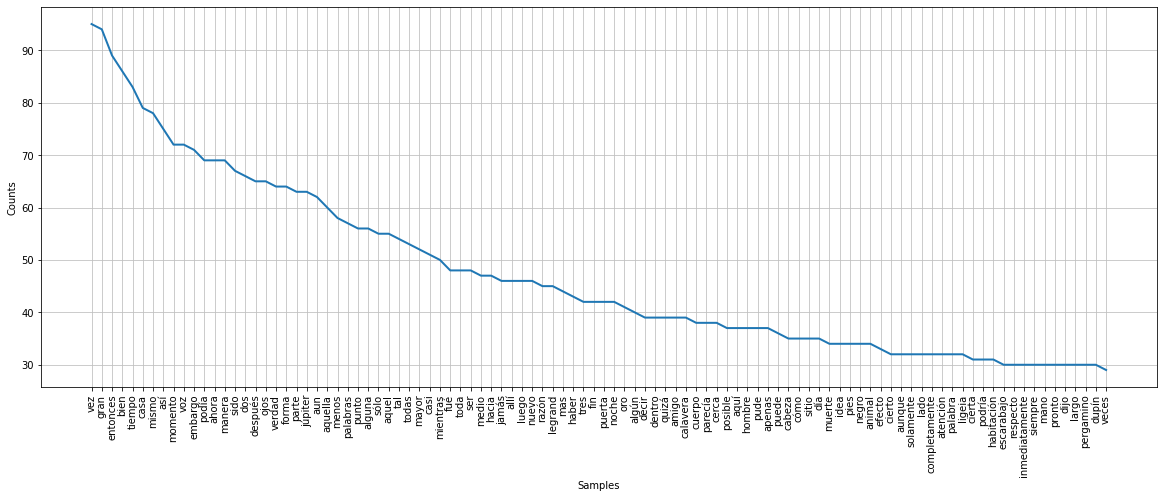

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20, 7))
fdist.plot(100)

## Pregunta 2

In [ ]:
bigrams = nltk.FreqDist(nltk.bigrams(book_no_sw))
print(bigrams.most_common(50))

[(('aquel', 'momento'), 20), (('largo', 'tiempo'), 12), (('voz', 'chillona'), 12), (('madame', 'espanaye'), 11), (('rue', 'morgue'), 10), (('mismo', 'tiempo'), 10), (('móskoe', 'ström'), 10), (('mayor', 'parte'), 9), (('alguna', 'vez'), 9), (('ojo', 'izquierdo'), 9), (('gran', 'parte'), 9), (('haber', 'sido'), 9), (('mademoiselle', 'espanaye'), 9), (('rara', 'vez'), 8), (('todas', 'partes'), 8), (('primera', 'vez'), 8), (('amo', 'will'), 8), (('dijo', 'dupín'), 8), (('casa', 'úsher'), 7), (('muerte', 'roja'), 7), (('decir', 'verdad'), 7), (('ninguna', 'clase'), 7), (('acá', 'allá'), 7), (('cuarto', 'piso'), 7), (('pudo', 'distinguir'), 7), (('voz', 'gruesa'), 7), (('cierto', 'modo'), 6), (('tal', 'vez'), 6), (('sabía', 'bien'), 6), (('todas', 'direcciones'), 6), (('podía', 'ser'), 6), (('ahora', 'bien'), 6), (('izquierdo', 'calavera'), 6), (('tres', 'cuatro'), 6), (('cincuenta', 'pies'), 6), (('debe', 'haber'), 6), (('hotel', 'obispo'), 6), (('arriba', 'abajo'), 6), (('lady', 'mádeline

## Pregunta 3

In [ ]:
def search_words(word_list):
  fdist = nltk.FreqDist(w.lower() for w in book_no_sw)
  for i in word_list:
    print(i + ':', fdist[i])

In [ ]:
terror_words = ['terror', 'oscuridad', 'muerte', 'sangre', 'dolor']
love_words = ['felicidad', 'emoción', 'amor', 'pareja', 'cariño']

In [ ]:
search_words(terror_words)

terror: 26
oscuridad: 0
muerte: 35
sangre: 15
dolor: 5


In [ ]:
search_words(love_words)

felicidad: 2
emoción: 8
amor: 8
pareja: 0
cariño: 1


## Pregunta 4

In [ ]:
from nltk.tokenize import *

In [ ]:
wsp = WhitespaceTokenizer()

In [ ]:
def find_language(word: str):
  languages = [l for l in nltk.corpus.udhr.fileids() if "Latin1" in l]
  words =  wsp.tokenize(word.lower())
  p_languages = []
  for lg in languages:
    for w in words:
      if w in nltk.corpus.udhr.words(lg):
        p_languages.append(lg)
  return p_languages

In [ ]:
find_language("Human")

['English-Latin1',
 'Interlingua-Latin1',
 'NigerianPidginEnglish-Latin1',
 'SolomonsPidgin_Pijin-Latin1',
 'TokPisin-Latin1']

In [ ]:
find_language("la sabiduría popular enseña")

['Ashaninca-Latin1',
 'Asturian_Bable-Latin1',
 'Catalan-Latin1',
 'Catalan_Catala-Latin1',
 'Chamorro-Latin1',
 'Chechewa_Nyanja-Latin1',
 'Chinanteco-Ajitlan-Latin1',
 'Corsican-Latin1',
 'Edo-Latin1',
 'French_Francais-Latin1',
 'Friulian_Friulano-Latin1',
 'HaitianCreole_Kreyol-Latin1',
 'HaitianCreole_Popular-Latin1',
 'Ido-Latin1',
 'Italian-Latin1',
 'Italian_Italiano-Latin1',
 'Kapampangan-Latin1',
 'Kiche_Quiche-Latin1',
 'Kinyamwezi_Nyamwezi-Latin1',
 'Lozi-Latin1',
 'Makonde-Latin1',
 'Miskito_Miskito-Latin1',
 'NorthernSotho_Pedi-Sepedi-Latin1',
 'Nyanja_Chechewa-Latin1',
 'Nyanja_Chinyanja-Latin1',
 'OccitanAuvergnat-Latin1',
 'OccitanLanguedocien-Latin1',
 'Otomi_Nahnu-Latin1',
 'Paez-Latin1',
 'Picard-Latin1',
 'Qechi_Kekchi-Latin1',
 'Rhaeto-Romance_Rumantsch-Latin1',
 'Romani-Latin1',
 'Sammarinese-Latin1',
 'Samoan-Latin1',
 'Somali-Latin1',
 'SouthernSotho_Sotho-Sesotho-Sutu-Sesutu-Latin1',
 'Spanish-Latin1',
 'Spanish_Espanol-Latin1',
 'Swaheli-Latin1',
 'Swahili_Ki

In [ ]:
find_language("derecho")

['Amahuaca-Latin1',
 'Bikol_Bicolano-Latin1',
 'Chamorro-Latin1',
 'Chinanteco-Ajitlan-Latin1',
 'Guarani-Latin1',
 'Spanish-Latin1',
 'Spanish_Espanol-Latin1',
 'Tzotzil-Latin1']

In [ ]:
find_language("right")

['English-Latin1', 'NigerianPidginEnglish-Latin1']

## Pregunta 5

In [ ]:
from nltk.corpus import wordnet as wn
wn.synsets('cat')

[Synset('cat.n.01'),
 Synset('guy.n.01'),
 Synset('cat.n.03'),
 Synset('kat.n.01'),
 Synset('cat-o'-nine-tails.n.01'),
 Synset('caterpillar.n.02'),
 Synset('big_cat.n.01'),
 Synset('computerized_tomography.n.01'),
 Synset('cat.v.01'),
 Synset('vomit.v.01')]

In [ ]:
cat = wn.synset('cat.n.01')

### Hipónimos

In [ ]:
types_of_cat = cat.hyponyms()

Synset('wildcat.n.03')

In [ ]:
types_of_cat

[Synset('domestic_cat.n.01'), Synset('wildcat.n.03')]

In [ ]:
sorted(lemma.name() for synset in types_of_cat for lemma in synset.lemmas())

['Felis_catus', 'Felis_domesticus', 'domestic_cat', 'house_cat', 'wildcat']

### Hiperónimos

In [ ]:
cat.hypernyms()
paths = cat.hypernym_paths()
len(paths)

1

In [ ]:
[synset.name() for synset in paths[0]]

['entity.n.01',
 'physical_entity.n.01',
 'object.n.01',
 'whole.n.02',
 'living_thing.n.01',
 'organism.n.01',
 'animal.n.01',
 'chordate.n.01',
 'vertebrate.n.01',
 'mammal.n.01',
 'placental.n.01',
 'carnivore.n.01',
 'feline.n.01',
 'cat.n.01']

## Pregunta 6

In [ ]:
cuentos_raw = corpus_esp.raw("cuentos_allan_poe_esp.txt")
parrafos = BlanklineTokenizer().tokenize(cuentos_raw)

sentence_count = 0

# El texto comienza en el index 45 luego de haber quitado encabezados de introducción y créditos en ingles.
for x in range(0,50):
    sent_text = nltk.sent_tokenize(parrafos[x]) 
    sentence_count = sentence_count + len(sent_text)
 
print ("Número medio de oraciones por párrafo: ", sentence_count / 50)

Número medio de oraciones por párrafo:  3.06


## Pregunta 7

In [ ]:
tweet_txt = f'La sabiduria popular enseña.\n"Las adulaciones son como los perfumes: logran deleitar, pero no se deben tragar".'
#print(tweet_txt)
tb_tokenizer = TreebankWordTokenizer()
tb_tokens = tb_tokenizer.tokenize(tweet_txt)
tb_tokens = [t for t in tb_tokens if t not in sw]
print(tb_tokens)

['La', 'sabiduria', 'popular', 'enseña.', "''", 'Las', 'adulaciones', 'perfumes', ':', 'logran', 'deleitar', ',', 'deben', 'tragar', "''", '.']


In [ ]:
ws_tokenizer = WhitespaceTokenizer()
ws_tokens = ws_tokenizer.tokenize(tweet_txt)
ws_tokens = [t for t in ws_tokens if t not in sw]
print(ws_tokens)

['La', 'sabiduria', 'popular', 'enseña.', '"Las', 'adulaciones', 'perfumes:', 'logran', 'deleitar,', 'deben', 'tragar".']


In [ ]:
st_tokenizer = SpaceTokenizer()
st_tokens = st_tokenizer.tokenize(tweet_txt)
st_tokens = [t for t in st_tokens if t not in sw]
print(st_tokens)

['La', 'sabiduria', 'popular', 'enseña.\n"Las', 'adulaciones', 'perfumes:', 'logran', 'deleitar,', 'deben', 'tragar".']


In [ ]:
wp_tokenizer = WordPunctTokenizer()
wp_tokens = wp_tokenizer.tokenize(tweet_txt)
wp_tokens = [t for t in wp_tokens if t not in sw]
print(wp_tokens)

['La', 'sabiduria', 'popular', 'enseña', '.', '"', 'Las', 'adulaciones', 'perfumes', ':', 'logran', 'deleitar', ',', 'deben', 'tragar', '".']


### De las salidas se observa que para este caso especifico el whitespace tokenizer da un mejor resultado al solo incluir las palabras. Los otros tokenizadores tienen problemas con las comillas, y el SpaceTokenizer no identifica el salto de linea.

## Pregunta 8

In [ ]:
from nltk import regexp_tokenize

tokens = regexp_tokenize(tweet_txt, pattern=r"\s|[\.,;:\"']", gaps=True)
print(tokens)

['La', 'sabiduria', 'popular', 'enseña', 'Las', 'adulaciones', 'son', 'como', 'los', 'perfumes', 'logran', 'deleitar', 'pero', 'no', 'se', 'deben', 'tragar']


## Pregunta 9

In [ ]:
from nltk.stem import PorterStemmer

In [ ]:
ps = PorterStemmer()

In [ ]:
def info_book(book):
  
  tot_sent = len(sent_tokenize(corpus_esp.raw(book)))
  tot_words = len([w for w in corpus_esp.words(book) if w.lower().isalpha()])
  tot_empty = len([w for w in corpus_esp.words(book) if w in sw and w.lower().isalpha()])
  token_per_sent = tot_words/tot_sent
  tot_pr = len(BlanklineTokenizer().tokenize(corpus_esp.raw(book)))
  sent_per_com = tot_sent/tot_pr
  sentence_count = 0
  root_freq =  nltk.FreqDist(ps.stem(w) for w in corpus_esp.words(book) if w not in sw and w.lower().isalpha() and ps.stem(w) not in sw)
  root_comm = root_freq.most_common(5)
  print("1. Total de oraciones: " + str(tot_sent))
  print("2. Total de tokens: " + str(tot_words))
  print("3. Total de palabras vacías: " + str(tot_empty))
  print("4. Número medio de oraciones por comentario: " + str(sent_per_com))
  print("5. Número medio de tokens por oración: " + str(token_per_sent))
  print("5. 5 raíces más comunes: " + str(root_comm))

In [ ]:
book_to_analyze = "cuentos_allan_poe_esp.txt"
info_book(book_to_analyze)

1. Total de oraciones: 2712
2. Total de tokens: 56679
3. Total de palabras vacías: 25886
4. Número medio de oraciones por comentario: 3.808988764044944
5. Número medio de tokens por oración: 20.89933628318584
5. 5 raíces más comunes: [('toda', 102), ('vez', 98), ('gran', 97), ('entonc', 92), ('ojo', 91)]
